<ipython-input-2-f4b0d906a978>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')


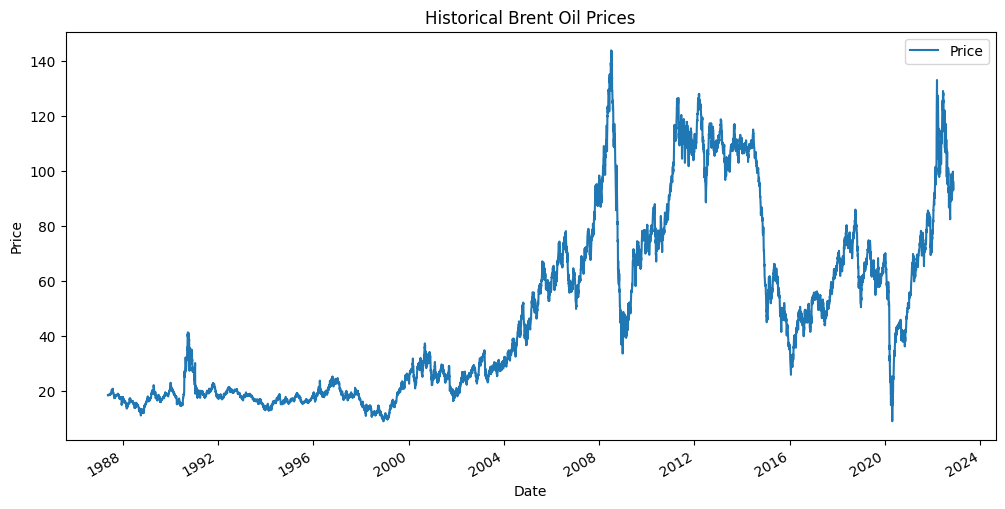

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (replace 'brent_data.csv' with your file)
df = pd.read_csv('BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')
df.plot(figsize=(12,6))
plt.title("Historical Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [3]:
print(df.describe())


             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Wed, 26 Feb 2025   AIC                          29093.899
Time:                        06:59:53   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

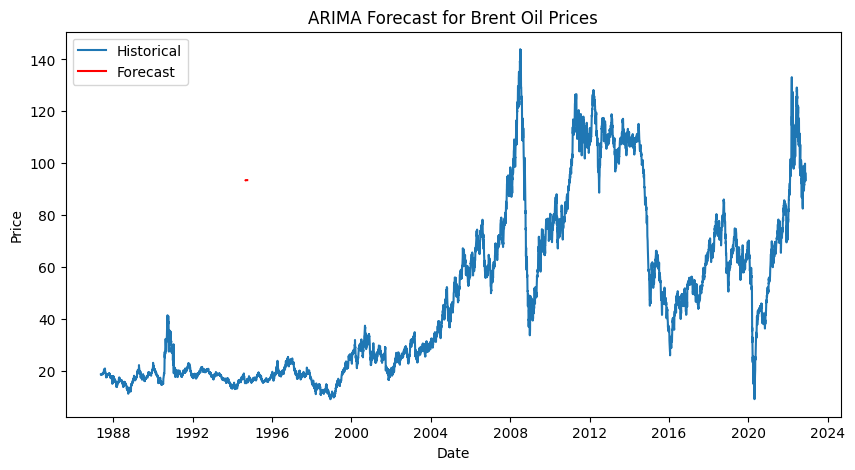

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Define the ARIMA model
model = ARIMA(df, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(10,5))
plt.plot(df.index, df, label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast for Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [6]:
!pip install arch==5.3.1
from arch import arch_model

# GARCH model on returns
df['returns'] = df['Price'].pct_change().dropna()
am = arch_model(df['returns'].dropna(), vol='Garch', p=1, q=1)
res = am.fit(disp='off')
print(res.summary())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for arch: filename=arch-5.3.1-cp311-cp311-linux_x86_64.whl size=1859725 sha256=30f6fba733103c8b14441976d21ec21b93162d62298b3c56ec1747642cc56c46
  Stored in directory: /root/.cache/pip/wheels/a6/55/04/53b70f73ea5ff238d6a490a98086a838ae9d9b81347bc29b77
Successfully built arch
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                22203.3
Distribution:                  Normal   AIC:                          -44398.6
Method:            Maximum Likelihood   BIC:                          -44370.2
                     

In [7]:
from statsmodels.tsa.vector_ar.var_model import VAR

model_var = VAR(df.dropna())
results_var = model_var.fit(maxlags=15, ic='aic')
print(results_var.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 26, Feb, 2025
Time:                     07:02:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -7.99821
Nobs:                     8995.00    HQIC:                  -8.03052
Log likelihood:           10727.5    FPE:                0.000320002
AIC:                     -8.04718    Det(Omega_mle):     0.000317808
--------------------------------------------------------------------
Results for equation Price
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.039388         0.022886            1.721           0.085
L1.Price            1.043117         0.017980           58.016           0.000
L1.returns         -1.125927         0.869576           -1.295      

Machine Learning with LSTM:

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Preprocess data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (adjust epochs and batch_size as needed)
model_lstm.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: nan
Epoch 2/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: nan
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: nan
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: nan
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: nan
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: nan
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: nan
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: nan
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: nan
Epoch 10/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: nan


Model Evaluation

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you have a test set available
y_true = df['Price'][-30:]
y_pred = forecast
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("ARIMA Model RMSE:", rmse)
print("ARIMA Model MAE:", mae)


ARIMA Model RMSE: 2.6201762063005236
ARIMA Model MAE: 2.042399744371806


In [11]:
import pickle

# Save ARIMA model (using statsmodels' save method)
model_fit.save("arima_model.pkl")
print("ARIMA model saved as 'arima_model.pkl'.")

# Save GARCH model using pickle
with open("garch_model.pkl", "wb") as f:
    pickle.dump(res, f)
print("GARCH model saved as 'garch_model.pkl'.")

# Save VAR model using pickle (if VAR model is used)
with open("var_model.pkl", "wb") as f:
    pickle.dump(results_var, f)
print("VAR model saved as 'var_model.pkl'.")

# Save LSTM model using Keras save method
model_lstm.save("lstm_model.h5")
print("LSTM model saved as 'lstm_model.h5'.")

# Save the scaler used for LSTM preprocessing
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("Scaler saved as 'scaler.pkl'.")


ARIMA model saved as 'arima_model.pkl'.
GARCH model saved as 'garch_model.pkl'.
VAR model saved as 'var_model.pkl'.
LSTM model saved as 'lstm_model.h5'.
Scaler saved as 'scaler.pkl'.
